In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle as pkl
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
import pandas as pd
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import cophenet
from cnns.core import FaceClustererFactory as fcf
from cnns.utils import clustering_utils as clu
import datetime

In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
%matplotlib inline
plt.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [86]:
def load_data(user_id):
    cnn_codes_dirpath = '/Users/babasarala/Desktop/face_clustering/openface_experiments'
    cnn_codes_pklpath = '%s/%i_cnn_codes.p'%(cnn_codes_dirpath, user_id)
    img_urls, X = pkl.load(open(cnn_codes_pklpath, 'rb'))
    return img_urls, X

In [83]:
user_id = 1946418

In [93]:
csv_filepath = '/Users/babasarala/Desktop/face_clustering_full_data/%i/%i_prod_fb_tags_img_urls_1.2_None.csv'\
%(user_id, user_id)
ground_truth_csv_filepath = '/Users/babasarala/Desktop/face_clustering_full_data/%i_clusters.csv'%user_id
settings_filepath = '/Users/babasarala/repos/cnns/config/agg_settings_v1.0.ini'
output_dirpath = '/Users/babasarala/Desktop/OpenFace+Agg_1.0_htmls'
img_urls, X = load_data(user_id)
clusterer = fcf.FaceClustererFactory.from_config_file(settings_filepath)
clusterer.load_data(img_urls, X)
cluster_df = aggcl_.run()

# load csv file with local image url info into a pandas dataframe
url_df = pd.read_csv(open(csv_filepath, 'rb'))

# load in the ground truth data
tagged_df = pd.read_csv(open(ground_truth_csv_filepath, 'rb'))

gt_df = pd.merge(
    cluster_df, url_df, left_on='face_url', right_on='img_url')
cols = ['face_id', 'tag', 'memorable_id', 'cluster_idx', 'face_url']

merged_df = pd.merge(
    gt_df, tagged_df, on=['face_id', 'memorable_id', 'user_id'])[cols]
true_labels = list(merged_df['tag'].values)
cluster_labels = list(merged_df['cluster_idx'].values)
h, c, v = homogeneity_completeness_v_measure(true_labels, cluster_labels)

num_images = len(img_urls)
num_tagged_images = len(tagged_df)
num_images_metrics = len(merged_df)

print 'Number of images in database: %i' % num_images
print 'Number of tagged images: %i' % num_tagged_images
print 'Number of images for which metrics are being calculated: %i' % num_images_metrics

cluster_map, filtered_cluster_map, cluster_stats = clusterer.convert_to_maps(
    cluster_df)

# visualize clusters
d = datetime.datetime.now()
file_id = d.strftime('%Y%m%d%M%S')
all_html_filepath = '%s/%s_%s_%s_%s_all.html' % (output_dirpath,
                                                 file_id,
                                                 user_id,
                                                 clusterer.model,
                                                 clusterer.version)

filtered_html_filepath = '%s/%s_%s_%s_%s_filt.html' % (output_dirpath,
                                                       file_id,
                                                       user_id,
                                                       clusterer.model,
                                                       clusterer.version)

clu.visualize_clusters(cluster_map, all_html_filepath)
clu.visualize_clusters(filtered_cluster_map, filtered_html_filepath)

Number of images in database: 419
Number of tagged images: 382
Number of images for which metrics are being calculated: 207


Playground

In [28]:
user_id = 1946418
method = 'average' # 'single', 'complete', 'average' '

In [29]:
csv_filepath = '/Users/babasarala/Desktop/face_clustering_full_data/%i/%i_prod_fb_tags_img_urls_1.2_None.csv' \
%(user_id, user_id)
ground_truth_csv_filepath = '/Users/babasarala/Desktop/face_clustering_full_data/%i_clusters.csv'%user_id
img_urls, X = load_data(user_id)

Z = linkage(X, method)
c, coph_dists = cophenet(Z, pdist(X))

In [40]:
Z[:, 2]

array([ 0.     ,  0.     ,  0.     ,  0.04837,  0.07467,  0.07855,
        0.09219,  0.1075 ,  0.10925,  0.12014,  0.15675,  0.15841,
        0.15951,  0.17156,  0.17595,  0.1831 ,  0.19239,  0.19368,
        0.20269,  0.20575,  0.20952,  0.21082,  0.21207,  0.21703,
        0.21815,  0.21996,  0.22072,  0.22639,  0.2266 ,  0.23929,
        0.24266,  0.24622,  0.24662,  0.24752,  0.24758,  0.2494 ,
        0.25013,  0.2516 ,  0.2577 ,  0.25841,  0.26171,  0.26457,
        0.26548,  0.26712,  0.26829,  0.26982,  0.27054,  0.27216,
        0.2724 ,  0.27279,  0.27533,  0.27778,  0.27898,  0.28411,
        0.28633,  0.28816,  0.29069,  0.29111,  0.29199,  0.29225,
        0.29343,  0.2959 ,  0.2966 ,  0.29699,  0.29815,  0.30073,
        0.30285,  0.30321,  0.30573,  0.30625,  0.30805,  0.31229,
        0.3137 ,  0.31545,  0.31613,  0.31815,  0.32225,  0.32293,
        0.32308,  0.32405,  0.32995,  0.33062,  0.3323 ,  0.33328,
        0.33333,  0.33485,  0.33512,  0.33595,  0.33987,  0.33

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


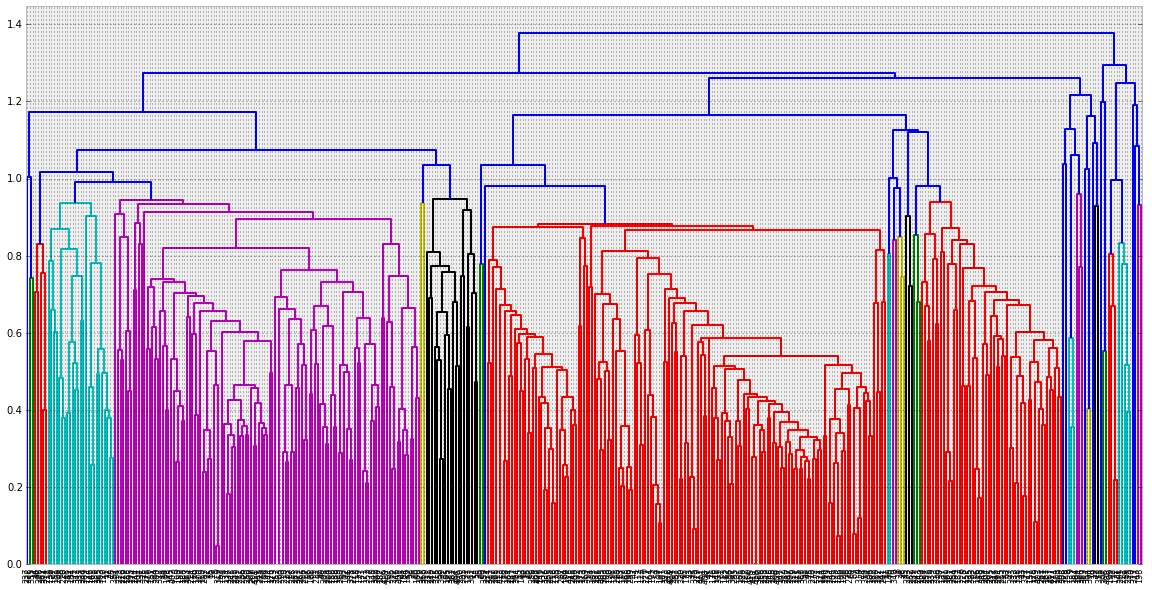

In [34]:
dendrogram(Z, leaf_rotation=90, leaf_font_size=8.)
plt.show()

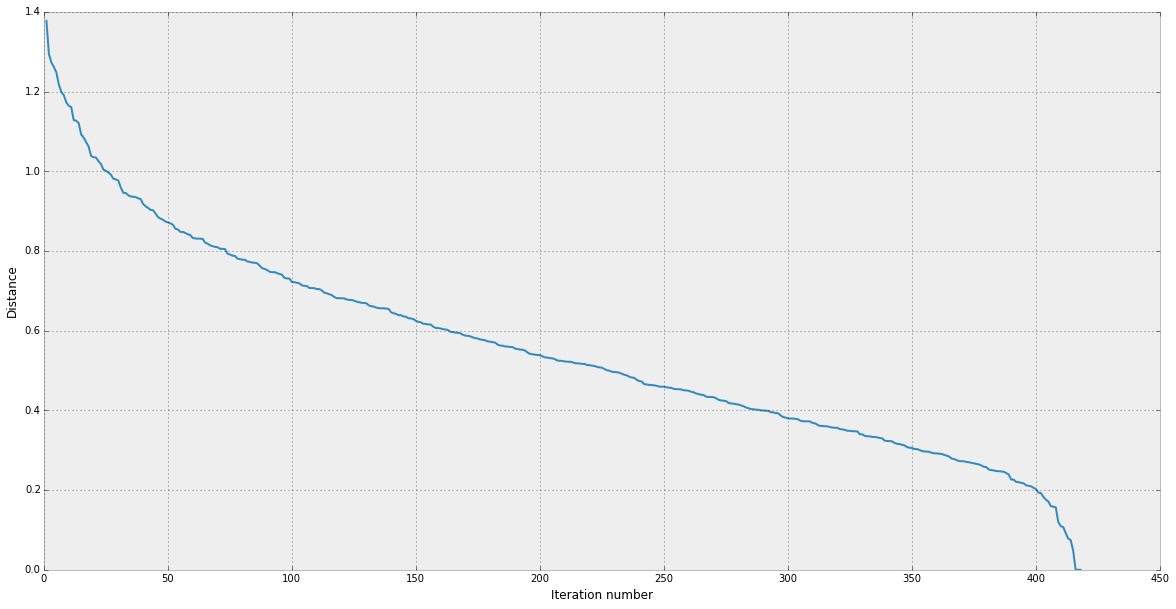

In [39]:
last = Z[:,2]
idxs = np.arange(1, len(Z)+1)
plt.xlabel('Iteration number')
plt.ylabel('Distance')
plt.plot(idxs, last[::-1])
plt.show()

In [43]:
clusters = fcluster(Z, 0.5, criterion='distance')
clusters

array([133, 130,  69,  40, 149,  47, 182, 132, 163, 205,  47,  20,  95,
       225,   4, 145, 106, 196,  38, 212, 111,  46,  20, 141, 161,  77,
       162, 194,  20,  48, 177,  93, 218, 141,  34,  97, 149, 147, 139,
         8,  61, 224, 131, 195,  64, 166,   5, 150,  74, 147,  48, 157,
        75,  95, 149, 104, 146, 215,  82, 132, 149, 146, 106, 201,  37,
       102,  44, 149,  13,  98, 159,  14, 147,  68, 149, 147,  48, 213,
       214,  75,  76,  86, 184, 125, 111,  46,  72,  53,  12, 221,  53,
        59,  61,  64,  24, 140,  58, 120, 127, 107, 149, 134,  64, 199,
        30, 149, 149, 128, 123, 111,  46, 126, 129, 146, 148, 147, 184,
       125,  65, 147,  20,  68, 147, 129,  18, 149, 149,  66, 197,  63,
       123, 195, 110, 195,  48, 149, 145, 178, 149,  10, 158, 154, 113,
       104,  49, 145,  18, 147,  69, 110, 173,   9, 183,  40,  74, 147,
        62, 196, 206,  19,  76,  18, 146,  50, 132, 147,  48, 198,  58,
       179, 152, 140, 218, 118,  28, 112,  49,  94, 102,  44, 14

419